In [22]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import CardinalActions
from rl.QLearning import *
from rl.MSR_dec import *
from rl.SR import *
from rl.SF import *
from rl.DQN import *
from rl.MQL import *


from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

In [23]:
env = gym.make("SocNavGym-v1", config="./configs/2_humans.yaml") 
env = DiscreteActions(env)

SEED = 5
EPISODES = 1000

discretizer = StateDiscretizer(xy_bins=30, env=env)

In [24]:
agent = MQL(
        action_size=7,
        learning_rate=0.1,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_mql_scratch = []
length_mql_scratch = []

env = gym.make("SocNavGym-v1", config="./configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_mql_scratch.append(episodes_length)
    rewards_mql_scratch.append(episodes_rewards)

100%|██████████| 1000/1000 [36:05<00:00,  2.17s/it]


In [25]:
def rolling_avg(x, w=20):
        return np.convolve(x, np.ones(w) / w, mode='valid')

In [26]:
length_rolling_ql_scratch = rolling_avg(length_mql_scratch)
rewards_rolling_ql_scratch = rolling_avg(rewards_mql_scratch)

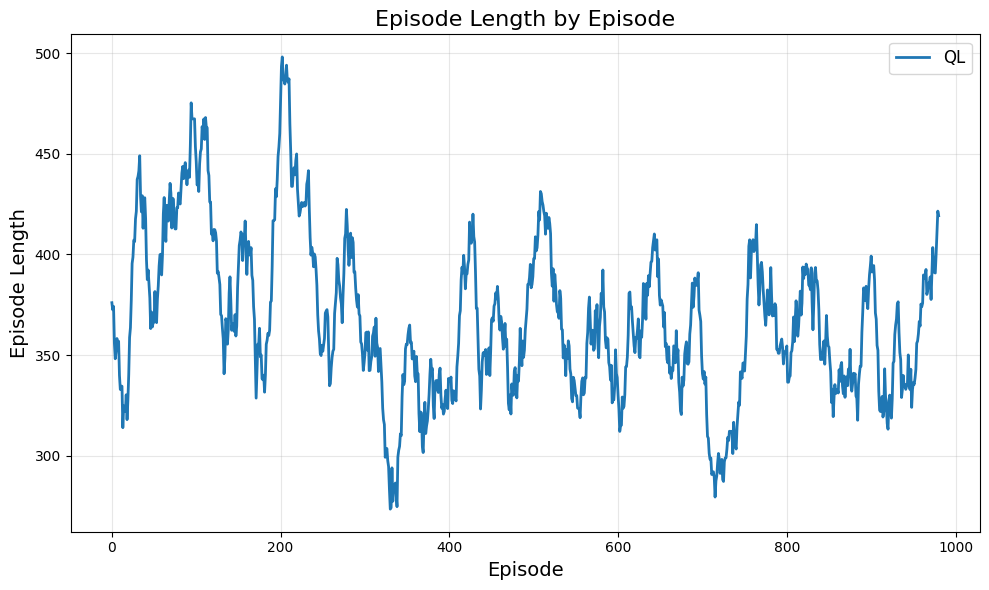

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(length_rolling_ql_scratch,  linewidth=2, label="QL")

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


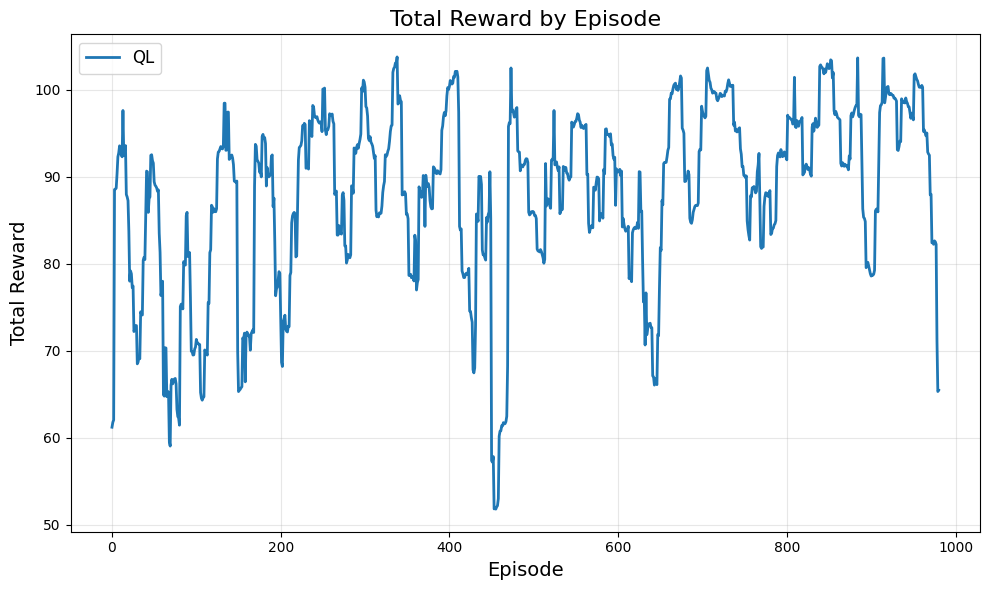

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(rewards_rolling_ql_scratch,  linewidth=2, label="QL")

ax.set_title("Total Reward by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Total Reward", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()
